In [23]:
from tweepy import OAuthHandler, Stream, StreamListener
from bs4 import BeautifulSoup
import requests, io, json
from tweet_saver import Tweet_Saver
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

creds = json.load(io.open('config_secret.json'))

auth = OAuthHandler(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
auth.set_access_token(creds['OAUTH_TOKEN'], creds['OAUTH_TOKEN_SECRET'])

def get_tweets(keywords, file, time_length):       
      
    stream = Stream(auth, Tweet_Saver(file, time_length))
    stream.filter(track=keywords)
    
    print("Done grabbing tweets!")

def graph_tweets(file, keywords):
    
    tweets_data = []
    for tweet in open(file, "r", encoding='utf8'):
        try:
            tweets_data.append(json.loads(tweet))
        except:
            pass
            
    
    tweet_counts = {word:0 for word in keywords}
    for tweet in tweets_data:
        for word in keywords:
            try:
                if word in tweet['text']:
                    tweet_counts[word] += 1
            except KeyError:
                pass
                    
    output_dict = {key:value for key, value in tweet_counts.items() if value!=0}
    
    fig, ax = plt.subplots(figsize=(14,8))
    width = .6
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('TV Show', fontsize=15)
    ax.set_ylabel('Number of tweets' , fontsize=15)
    ax.set_title('Top TV Shows', fontsize=15, fontweight='bold')
    plt.bar(range(len(output_dict)), output_dict.values(), width, align='center')
    plt.xticks(range(len(output_dict)), output_dict.keys(), rotation=90)
    plt.xlim([0,len(output_dict)])
    

In [20]:
response = requests.get('http://www.tvguide.com/trending-tonight/')
txt = BeautifulSoup(response.text, 'lxml')

show_names = []
for trends in txt.find_all('a',{'class': 'listings-program-link'}):
    if len(trends.text) > 3: #Prevents shows with common names from dominating
        show_names.append(trends.text)

In [21]:
print("Getting tweets")
tweet_file = 'tweets1.txt'

get_tweets(show_names, tweet_file, 30)

Getting tweets
Done grabbing tweets!


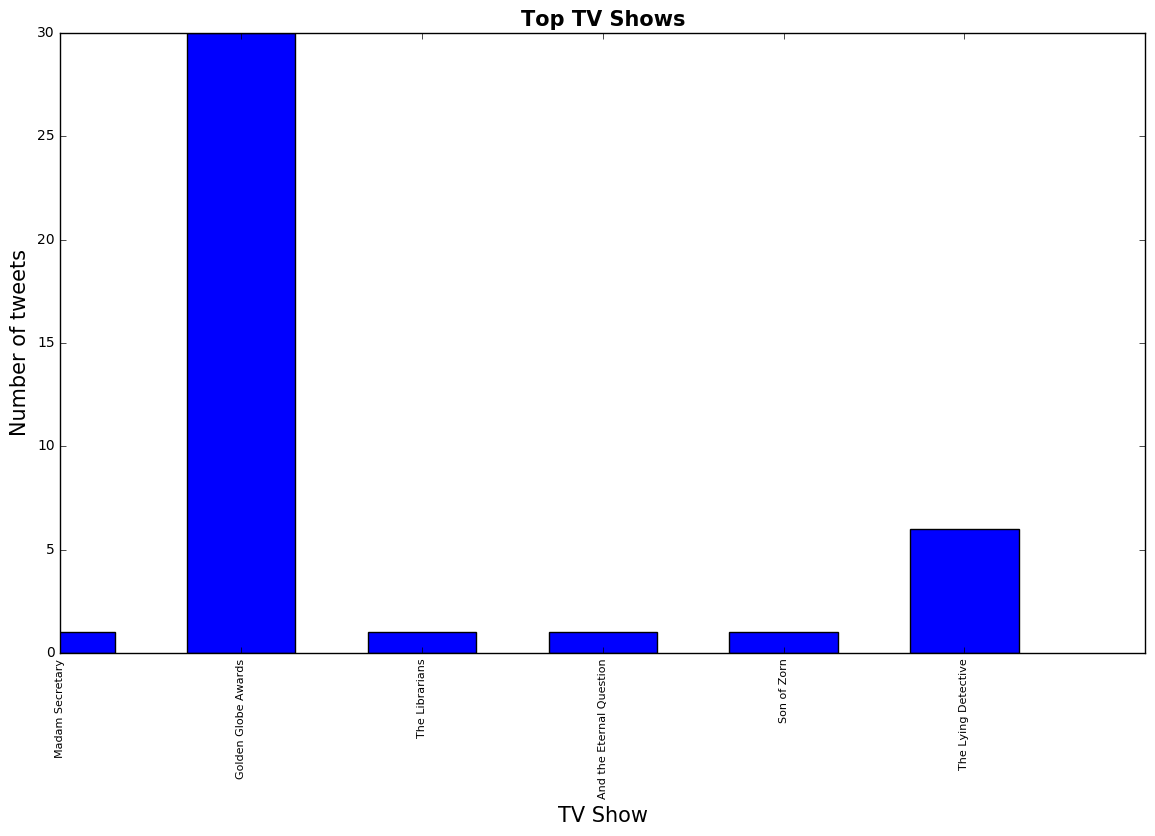

In [24]:
graph_tweets(tweet_file, show_names)